<a href="https://colab.research.google.com/github/jaynarayan94/All-Important-Topics-Codes/blob/master/Dimensionality_Reduction_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction Techniques
There are two types of Dimensionality Reduction techniques:

* Feature Selection
* Feature Extraction

Feature Selection techniques are Backward Elimination, Forward Selection, Bidirectional Elimination, Score Comparison and more.

In this part we will cover the following Feature Extraction techniques:

* Principal Component Analysis (PCA)
* Linear Discriminant Analysis (LDA)
* Kernel PCA


## Model : Principal Component Analysis (PCA)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [3]:
from google.colab import files

upload1 = files.upload()

Saving Wine.csv to Wine.csv


In [4]:
import io

dataset = pd.read_csv(io.StringIO(upload1['Wine.csv'].decode('utf-8')))

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
Customer_Segment        178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB
None


In [5]:
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [6]:
from collections import Counter

Counter(dataset['Customer_Segment'])

Counter({1: 59, 2: 71, 3: 48})

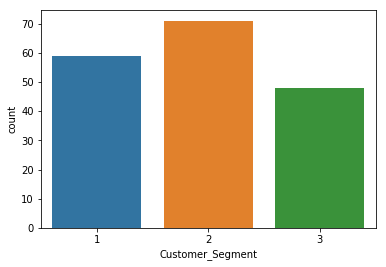

In [7]:
sns.countplot(dataset['Customer_Segment'])

In [10]:
X = dataset.iloc[:,0:-1]

y = dataset.iloc[:,-1]

X.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state=123)

print(x_train.shape,y_train.shape)

print(x_test.shape,y_test.shape)

(142, 13) (142,)
(36, 13) (36,)


In [0]:
# Feature Scaling 

from sklearn.preprocessing import StandardScaler

scale_X = StandardScaler()

X_train = scale_X.fit_transform(x_train)

X_test = scale_X.transform(x_test)

In [14]:
# Applying PCA

from sklearn.decomposition import PCA

pca = PCA(n_components = None)

X_train = pca.fit_transform(X_train)

X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[0.36851404 0.19211424 0.11154099 0.07187879 0.06463649 0.04394747
 0.04313507 0.02809911 0.02148312 0.0190743  0.01479529 0.01267632
 0.00810475]


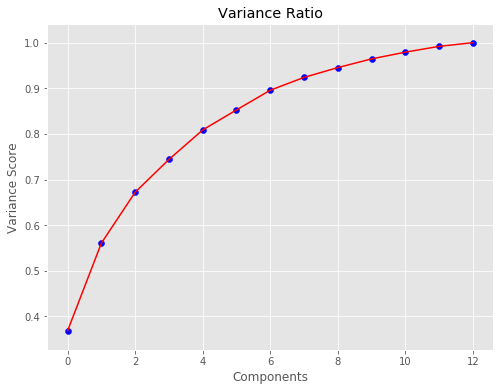

In [15]:
plt.style.use('ggplot')
plt.figure(figsize = (8,6))
plt.scatter(x = range(0,13),y = np.cumsum(explained_variance),c = 'blue')
plt.plot(np.cumsum(explained_variance),c = 'red')
plt.title('Variance Ratio')
plt.xlabel('Components')
plt.ylabel('Variance Score')
plt.show()

In [16]:
# Applying PCA

from sklearn.decomposition import PCA

pca = PCA(n_components = 6)

X_train = pca.fit_transform(X_train)

X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[0.36851404 0.19211424 0.11154099 0.07187879 0.06463649 0.04394747]


In [17]:
from sklearn.linear_model import LogisticRegression

Log_Reg_model = LogisticRegression(random_state=0)

Log_Reg_model.fit(X_train,y_train)

Log_Reg_model.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


1.0

In [18]:
y_pred = Log_Reg_model.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

#print(confusion_matrix(y_pred,y_test))
print('Confustion Matrix :\n',pd.crosstab(y_test,y_pred))
print()
print('Accuracy Score :',accuracy_score(y_pred,y_test))
print()
print(classification_report(y_pred,y_test))

Confustion Matrix :
 col_0              1   2   3
Customer_Segment            
1                 12   0   0
2                  0  14   0
3                  0   0  10

Accuracy Score : 1.0

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## Model :  Linear Discriminant Analysis (LDA)

In [9]:
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [19]:
X = dataset.iloc[:,0:-1]

y = dataset.iloc[:,-1]

X.head()

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state=123)

print(x_train.shape,y_train.shape)

print(x_test.shape,y_test.shape)


(142, 13) (142,)
(36, 13) (36,)


In [0]:
# Feature Scaling 

from sklearn.preprocessing import StandardScaler

scale_X = StandardScaler()

X_train = scale_X.fit_transform(x_train)

X_test = scale_X.transform(x_test)

In [0]:
# Applying LDA to the dataset

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(n_components=2)

X_train = LDA.fit_transform(X_train,y_train)

X_test= LDA.transform(X_test)


In [30]:
# Applying the Logistic Regression to the training set

from sklearn.linear_model import LogisticRegression

Log_Reg_model = LogisticRegression(random_state=0)

Log_Reg_model.fit(X_train,y_train)

Log_Reg_model.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9722222222222222

In [31]:
y_pred = Log_Reg_model.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

#print(confusion_matrix(y_pred,y_test))
print('Confustion Matrix :\n',pd.crosstab(y_test,y_pred))
print()
print('Accuracy Score :',accuracy_score(y_pred,y_test))
print()
print(classification_report(y_pred,y_test))

Confustion Matrix :
 col_0              1   2   3
Customer_Segment            
1                 12   0   0
2                  0  13   1
3                  0   0  10

Accuracy Score : 0.9722222222222222

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.93      1.00      0.96        13
           3       1.00      0.91      0.95        11

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



## Model : Kernel PCA

In [33]:
from google.colab import files

upload2 = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [34]:
import io

dataset = pd.read_csv(io.StringIO(upload2['Social_Network_Ads.csv'].decode('utf-8')))

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null float64
EstimatedSalary    400 non-null float64
Purchased          400 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 15.7+ KB
None


In [35]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [36]:
X = dataset.iloc[:,[2,3]]

y = dataset.iloc[:,4]

X.head()

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state=123)

print(x_train.shape,y_train.shape)

print(x_test.shape,y_test.shape)

(320, 2) (320,)
(80, 2) (80,)


In [0]:
# Feature Scaling 

from sklearn.preprocessing import StandardScaler

scale_X = StandardScaler()

X_train = scale_X.fit_transform(x_train)

X_test = scale_X.transform(x_test)

In [0]:
# Applying Kernal PCA

from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components = 2,kernel = 'rbf')

X_train = kpca.fit_transform(X_train)

X_test = kpca.transform(X_test)


In [41]:
# Applying the Logistic Regression to the training set

from sklearn.linear_model import LogisticRegression

Log_Reg_model = LogisticRegression(random_state=0)

Log_Reg_model.fit(X_train,y_train)

Log_Reg_model.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9

In [42]:
y_pred = Log_Reg_model.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

#print(confusion_matrix(y_pred,y_test))
print('Confustion Matrix :\n',pd.crosstab(y_test,y_pred))
print()
print('Accuracy Score :',accuracy_score(y_pred,y_test))
print()
print(classification_report(y_pred,y_test))

Confustion Matrix :
 col_0       0   1
Purchased        
0          46   5
1           3  26

Accuracy Score : 0.9

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        49
           1       0.90      0.84      0.87        31

    accuracy                           0.90        80
   macro avg       0.90      0.89      0.89        80
weighted avg       0.90      0.90      0.90        80

